In [59]:
import torch
from torch import nn
import math

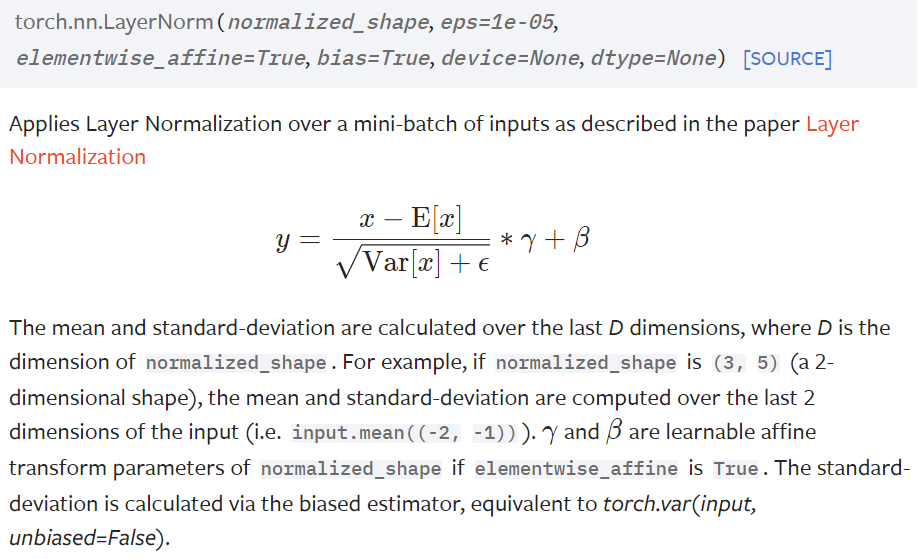

In [60]:
a = torch.randn(5, 4) + 2000  # create random tensor with N=5, L/C=4 and mean=2000, var=1
n = torch.nn.LayerNorm(4, eps=0, elementwise_affine=False)
[[torch.mean(i), torch.var(i, unbiased=False)] for i in n(a)]  # should be near [0, 1]

[[tensor(0.), tensor(1.0000)],
 [tensor(0.0002), tensor(1.0000)],
 [tensor(0.0001), tensor(0.9997)],
 [tensor(0.), tensor(1.0000)],
 [tensor(3.0518e-05), tensor(1.0001)]]

In [61]:
n(a)

tensor([[-0.0500, -1.1685,  1.5813, -0.3628],
        [-0.6362, -0.0908,  1.6528, -0.9248],
        [-0.4839,  1.7188, -0.4609, -0.7734],
        [-1.7040,  0.4780,  0.8542,  0.3717],
        [-1.0189, -0.9386,  1.2660,  0.6917]])

In [62]:
a

tensor([[2000.3914, 1999.8245, 2001.2181, 2000.2328],
        [2000.7234, 2000.9711, 2001.7631, 2000.5924],
        [2000.5175, 2001.1862, 2000.5244, 2000.4296],
        [1997.6262, 2000.9766, 2001.5542, 2000.8134],
        [1998.5161, 1998.6005, 2000.9147, 2000.3118]])

In [63]:
a = torch.randn(2, 3, 4) + 2000

In [64]:
a

tensor([[[1999.9122, 1999.1132, 1998.9449, 1999.2607],
         [1999.7429, 1999.8759, 1999.2739, 1999.8804],
         [1999.3385, 2000.1970, 2000.2418, 2000.6835]],

        [[2001.3301, 2000.4111, 1998.4890, 1999.1754],
         [2000.2390, 2000.0109, 1999.4976, 2001.2314],
         [1998.8180, 2000.2816, 1998.9922, 2000.5110]]])

In [65]:
n = torch.nn.LayerNorm((3,4), eps=0, elementwise_affine=False)

In [66]:
n(a)

tensor([[[ 0.4109, -1.1775, -1.5117, -0.8840],
         [ 0.0745,  0.3386, -0.8579,  0.3477],
         [-0.7295,  0.9771,  1.0659,  1.9438]],

        [[ 1.5986,  0.5601, -1.6121, -0.8364],
         [ 0.3655,  0.1077, -0.4724,  1.4871],
         [-1.2405,  0.4138, -1.0435,  0.6729]]])

In [67]:
n(a)[0].mean(), torch.var(n(a)[0], unbiased=False)

(tensor(-0.0002), tensor(1.0001))

In [74]:
p = (a[0]-a[0].mean())/torch.sqrt(torch.var(a[0], unbiased=False))

In [75]:
p

tensor([[ 0.4110, -1.1772, -1.5116, -0.8839],
        [ 0.0745,  0.3387, -0.8577,  0.3477],
        [-0.7293,  0.9771,  1.0661,  1.9440]])

In [76]:
p-n(a)[0]

tensor([[1.2708e-04, 2.4796e-04, 1.3196e-04, 1.3095e-04],
        [2.4617e-05, 8.8871e-05, 2.1201e-04, 3.2991e-05],
        [1.4549e-04, 2.1458e-05, 1.9968e-04, 1.0645e-04]])